In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r'C:\Users\saumy\OneDrive\Pictures\Intern project\supermart_sales.csv')
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
df['Order Date']=pd.to_datetime(df['Order Date'],format='mixed',dayfirst=True)
df['Order Year']=df['Order Date'].dt.year

# Data Cleaning

### 1.Missing Values

In [6]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
Order Year       0
dtype: int64

## 2.Duplicate Values

In [7]:
df.duplicated().value_counts()

False    9994
Name: count, dtype: int64

### Negative Values

In [8]:
(df[['Discount','Profit','Sales']]<0).any()

Discount    False
Profit      False
Sales       False
dtype: bool

# KPI Snapshot

In [15]:
min_date = df['Order Date'].min()
max_date = df['Order Date'].max()
print(f"Time Span : {min_date} to {max_date}")

Total_Orders=df.shape[0]
Total_Sales = df['Sales'].sum()
Total_Profit = df['Profit'].sum()
Avg_Discount = df['Discount'].mean()
Profit_Margin = (Total_Profit/Total_Sales)*100
Unique_Customer = df['Customer Name'].nunique()
Order_Per_Customer = df.groupby('Customer Name')['Order ID'].count()
print('Total Orders:',Total_Orders)
print('Total Sales:',Total_Sales)
print('Total Profit:',Total_Profit)
print('Avg Discount:',Avg_Discount)
print('Profit Margin:',Profit_Margin)
print('Unique Customer:',Unique_Customer)
print('Order per Customer:',Order_Per_Customer.head())

Time Span : 2015-01-02 00:00:00 to 2018-12-30 00:00:00
Total Orders: 9994
Total Sales: 14956982
Total Profit: 3747121.1999999997
Avg Discount: 0.22681709025415253
Profit Margin: 25.052655676125035
Unique Customer: 50
Order per Customer: Customer Name
Adavan    205
Aditi     187
Akash     196
Alan      198
Amrish    227
Name: Order ID, dtype: int64


# Data Visualisation

Text(0.5, 1.0, 'Sales by Category')

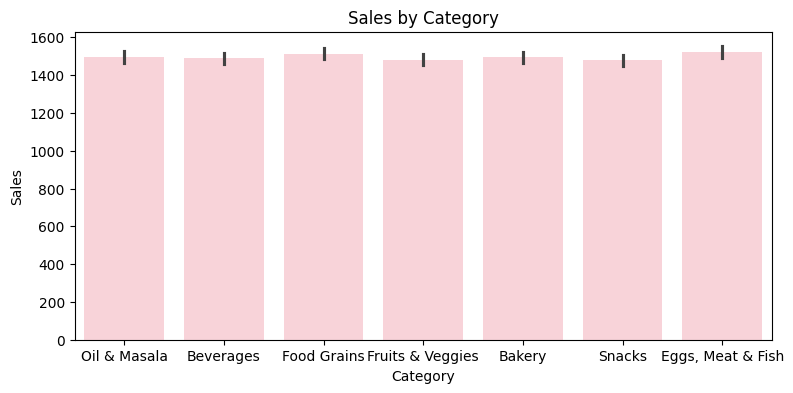

In [10]:
plt.figure(figsize=(9,4))  # sales by category
sns.barplot(data=df,x="Category",y="Sales",color='pink',alpha=0.8)
plt.title('Sales by Category')

Text(0.5, 1.0, 'Sales by Sub Category')

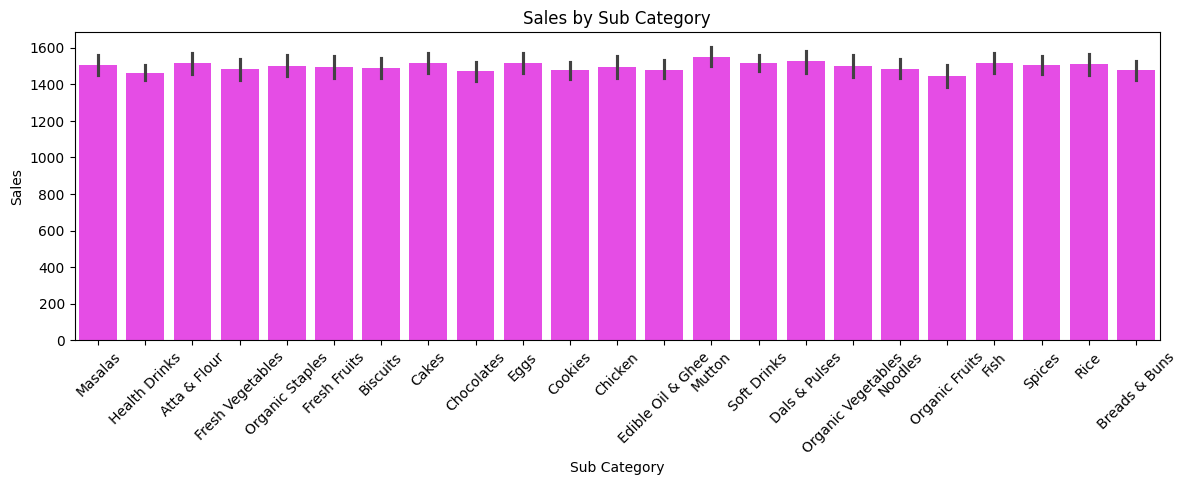

In [11]:
plt.figure(figsize=(14,4))  # sales by sub category
sns.barplot(data=df,x="Sub Category",y="Sales",color='magenta',alpha=0.8)
plt.xticks(rotation=45)
plt.title('Sales by Sub Category')

Text(0, 0.5, 'Sales')

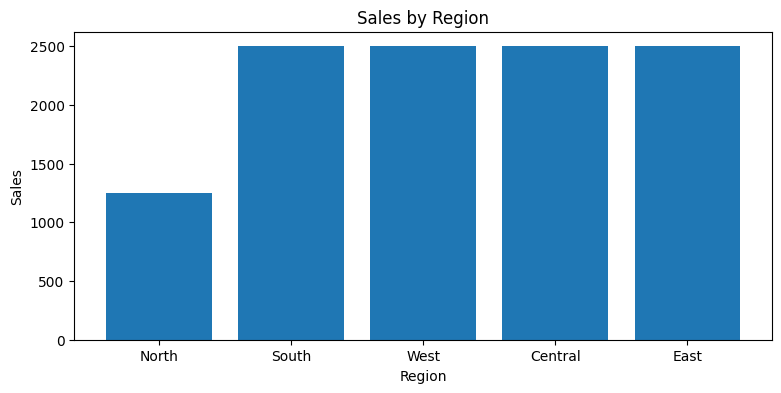

In [12]:
plt.figure(figsize=(9,4))
plt.bar(df['Region'],df['Sales'])
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')

Text(0.5, 1.0, 'Yearly Distribution of Sales and Profit generated')

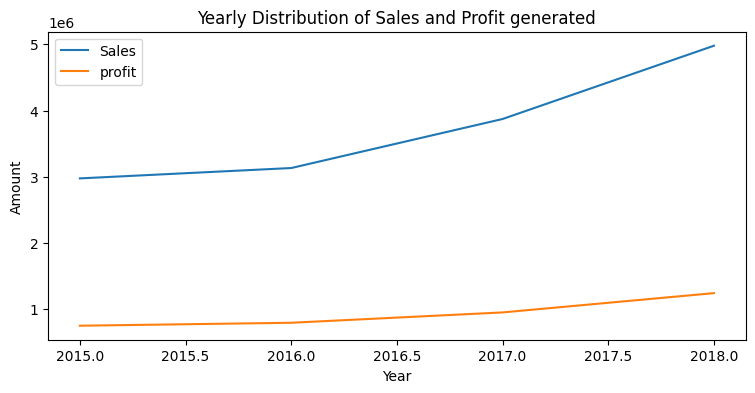

In [13]:
Total_revenue=df.groupby(['Order Year'])[['Sales','Profit']].sum().reset_index()  # sales trend
plt.figure(figsize=(9,4))
plt.plot(Total_revenue['Order Year'],Total_revenue['Sales'],label='Sales')
plt.plot(Total_revenue['Order Year'],Total_revenue['Profit'],label='profit')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Yearly Distribution of Sales and Profit generated')

Text(0.5, 1.0, 'Monthly Income Generated')

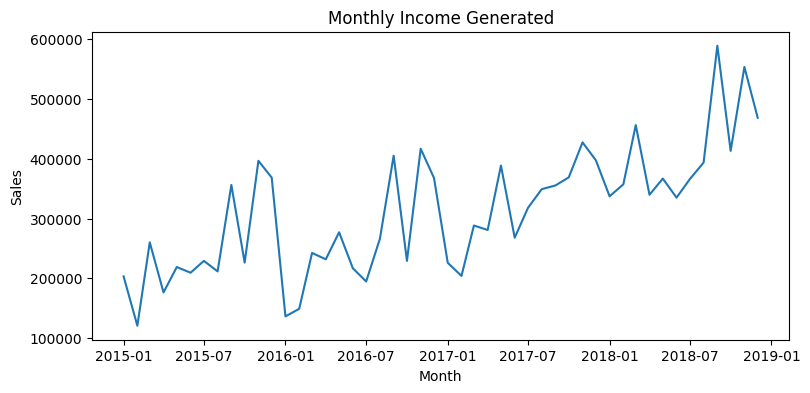

In [14]:
monthly_sales=df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index().rename(columns={'Order Date':'Month'})
monthly_sales['Month']=monthly_sales['Month'].dt.to_timestamp()
plt.figure(figsize=(9,4))
sns.lineplot(data=monthly_sales,x='Month',y='Sales')
plt.title('Monthly Income Generated')

Text(0.5, 1.0, 'Relationship between Discount and Profit')

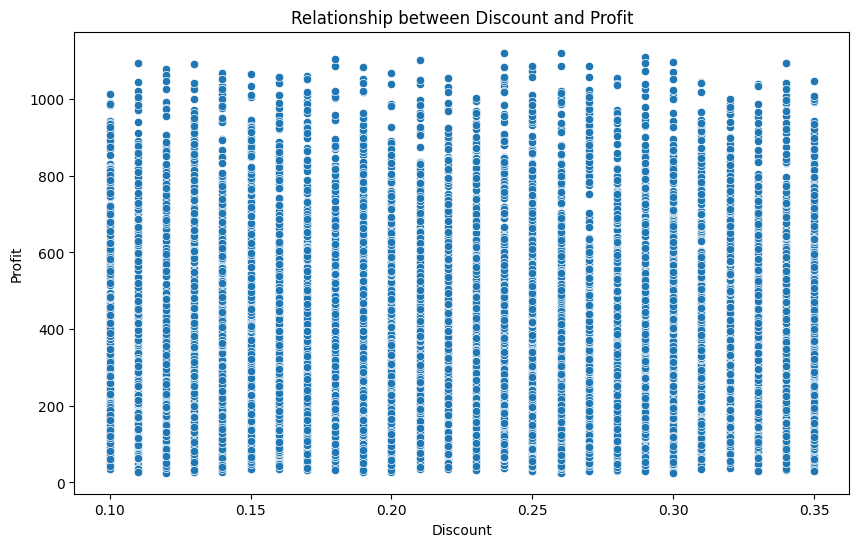

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Relationship between Discount and Profit')